In [121]:
import pandas as pd
import numpy as np
import os
import warnings
import matplotlib.pyplot as plt
import seaborn as sns


In [122]:
import scipy.stats as stats

In [123]:
df = pd.read_csv('City Power Consumption.csv')
df.head(5)

,S no,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Power Consumption in A Zone
0,1,6.559,73.8,0.083,0.051,0.119,158.0,1,34055.69620
1,2,6.414,74.5,0.083,0.070,0.085,159.0,1,29814.68354
2,3,6.313,74.5,0.08,0.062,0.100,151.0,1,29128.10127
3,4,6.121,75,0.083,0.091,0.096,151.0,1,28228.86076
4,5,5.921,75.7,0.081,0.048,0.085,154.0,1,27335.69620


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52583 entries, 0 to 52582
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   S no                          52583 non-null  int64  
 1   Temperature                   52263 non-null  object 
 2   Humidity                      52558 non-null  object 
 3   Wind Speed                    52512 non-null  object 
 4   general diffuse flows         52275 non-null  float64
 5   diffuse flows                 52568 non-null  float64
 6   Air Quality Index (PM)        52565 non-null  float64
 7   Cloudiness                    52583 non-null  int64  
 8    Power Consumption in A Zone  52583 non-null  float64
dtypes: float64(4), int64(2), object(3)
memory usage: 3.6+ MB


In [245]:
distinct_cloudiness_count = df['Cloudiness'].nunique()
print(distinct_cloudiness_count)

2


In [246]:
df['Cloudiness'].value_counts()

0.0    52092
1.0      491
Name: Cloudiness, dtype: int64

In [126]:
df.head()

,S no,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Power Consumption in A Zone
0,1,6.559,73.8,0.083,0.051,0.119,158.0,1,34055.69620
1,2,6.414,74.5,0.083,0.070,0.085,159.0,1,29814.68354
2,3,6.313,74.5,0.08,0.062,0.100,151.0,1,29128.10127
3,4,6.121,75,0.083,0.091,0.096,151.0,1,28228.86076
4,5,5.921,75.7,0.081,0.048,0.085,154.0,1,27335.69620


In [127]:
df.tail()

,S no,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Power Consumption in A Zone
52578,52579,NaN,75.6,0.094,436.2,38.96,157.0,0,34444.55696
52579,52580,NaN,73.5,0.089,451.6,37.73,157.0,0,34438.48101
52580,52581,NaN,70.1,0.085,466.4,37.49,157.0,0,33873.41772
52581,52582,NaN,67.75,0.086,477.0,37.37,152.0,0,33988.86076
52582,52583,NaN,66.24,0.088,485.7,36.72,155.0,0,34158.98734


In [128]:
df.isnull().sum()/ df.shape[0]

S no                            0.000000
Temperature                     0.006086
Humidity                        0.000475
Wind Speed                      0.001350
general diffuse flows           0.005857
diffuse flows                   0.000285
Air Quality Index (PM)          0.000342
Cloudiness                      0.000000
 Power Consumption in A Zone    0.000000
dtype: float64

In [129]:
df.duplicated().sum()

0

In [130]:
df= df.astype({"Cloudiness":'float'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52583 entries, 0 to 52582
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   S no                          52583 non-null  int64  
 1   Temperature                   52263 non-null  object 
 2   Humidity                      52558 non-null  object 
 3   Wind Speed                    52512 non-null  object 
 4   general diffuse flows         52275 non-null  float64
 5   diffuse flows                 52568 non-null  float64
 6   Air Quality Index (PM)        52565 non-null  float64
 7   Cloudiness                    52583 non-null  float64
 8    Power Consumption in A Zone  52583 non-null  float64
dtypes: float64(5), int64(1), object(3)
memory usage: 3.6+ MB


In [131]:
df= df.apply(pd.to_numeric, errors= 'coerce')

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52583 entries, 0 to 52582
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   S no                          52583 non-null  int64  
 1   Temperature                   52260 non-null  float64
 2   Humidity                      52557 non-null  float64
 3   Wind Speed                    52508 non-null  float64
 4   general diffuse flows         52275 non-null  float64
 5   diffuse flows                 52568 non-null  float64
 6   Air Quality Index (PM)        52565 non-null  float64
 7   Cloudiness                    52583 non-null  float64
 8    Power Consumption in A Zone  52583 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 3.6 MB


In [133]:
df.rename(columns={'Wind Speed': 'wind_speed','general diffuse flows':'general_diffuse_flows', 'diffuse flows':'diffuse_flows', 'Air Quality Index (PM)':'Air_Quality_Index_PM' , ' Power Consumption in A Zone':'power_consumption_in_A_zone'}, inplace = True)

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52583 entries, 0 to 52582
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   S no                         52583 non-null  int64  
 1   Temperature                  52260 non-null  float64
 2   Humidity                     52557 non-null  float64
 3   wind_speed                   52508 non-null  float64
 4   general_diffuse_flows        52275 non-null  float64
 5   diffuse_flows                52568 non-null  float64
 6   Air_Quality_Index_PM         52565 non-null  float64
 7   Cloudiness                   52583 non-null  float64
 8   power_consumption_in_A_zone  52583 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 3.6 MB


In [135]:
#missing value treatment with mean()
df['Temperature']= df['Temperature'].fillna(df['Temperature'].mean())
df['Humidity']=df['Humidity'].fillna(df['Humidity'].mean())
df['wind_speed']= df['wind_speed'].fillna(df['wind_speed'].mode()[0])
df['general_diffuse_flows']= df['general_diffuse_flows'].fillna(df['general_diffuse_flows'].mean())
df['diffuse_flows']= df['diffuse_flows'].fillna(df['diffuse_flows'].mean())
df['Air_Quality_Index_PM']= df['Air_Quality_Index_PM'].fillna(df['Air_Quality_Index_PM'].mean())


In [136]:
df.isnull().sum()

S no                           0
Temperature                    0
Humidity                       0
wind_speed                     0
general_diffuse_flows          0
diffuse_flows                  0
Air_Quality_Index_PM           0
Cloudiness                     0
power_consumption_in_A_zone    0
dtype: int64

<AxesSubplot:xlabel='Temperature'>

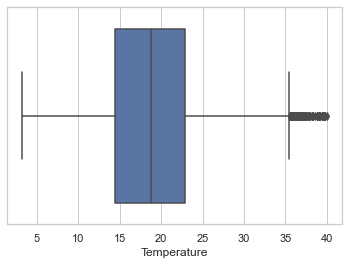

In [137]:
sns.boxplot(data=df, x=df['Temperature'])

<AxesSubplot:xlabel='Temperature', ylabel='Count'>

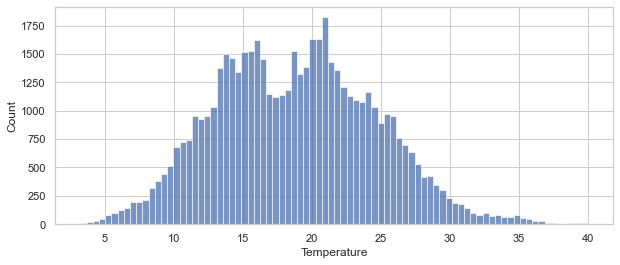

In [138]:
fig, ax= plt.subplots(figsize=(10,4))
sns.histplot(df.Temperature)

<AxesSubplot:xlabel='Humidity'>

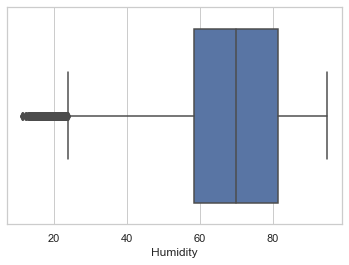

In [139]:
sns.boxplot(data=df, x=df['Humidity'])

<AxesSubplot:xlabel='Humidity', ylabel='Count'>

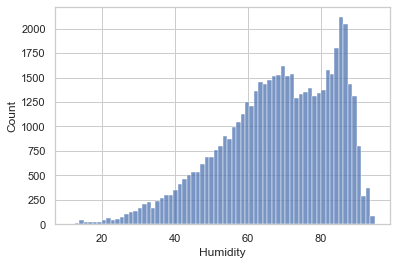

In [140]:
#sns.scatterplot(data=df, x=df['Humidity'])
sns.histplot(df.Humidity)

<AxesSubplot:xlabel='wind_speed'>

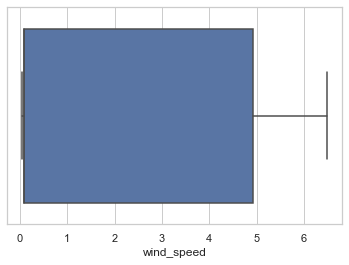

In [141]:
sns.boxplot(data=df, x= df['wind_speed'] )

<AxesSubplot:xlabel='wind_speed', ylabel='Count'>

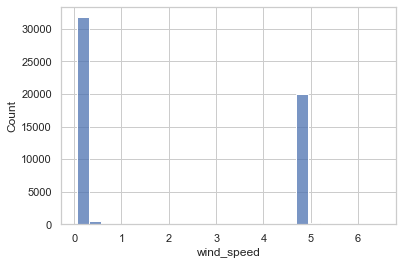

In [142]:
sns.histplot(df.wind_speed)

In [143]:
#sns.scatterplot(df.wind_speed)

In [144]:
#sns.scatterplot(df.general_diffuse_flows)

<AxesSubplot:xlabel='general_diffuse_flows'>

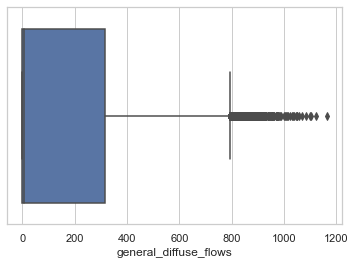

In [145]:
sns.boxplot(data= df, x=df['general_diffuse_flows'])

<AxesSubplot:xlabel='general_diffuse_flows', ylabel='Count'>

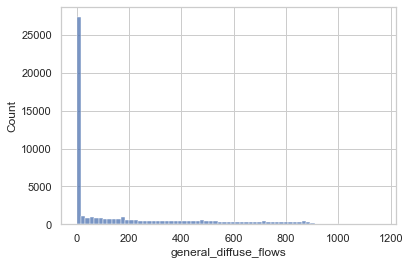

In [146]:
sns.histplot(df.general_diffuse_flows)

<AxesSubplot:xlabel='diffuse_flows', ylabel='Count'>

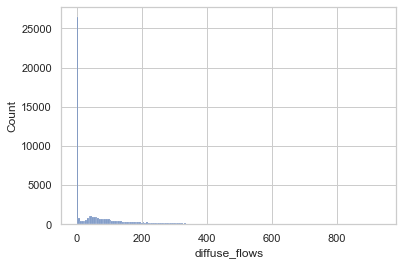

In [147]:
sns.histplot(df.diffuse_flows)

<AxesSubplot:xlabel='diffuse_flows'>

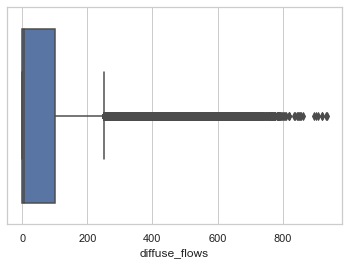

In [148]:
sns.boxplot(data= df, x= df['diffuse_flows'])

In [149]:
distinct_temperature_count = df['Temperature'].nunique()
print("Number of distinct temperatures:", distinct_temperature_count)
distinct_Humidity_count = df['Humidity'].nunique()
print("Number of distinct Humidity:", distinct_Humidity_count)
distinct_Air_Quality_Index_PM_count = df['Air_Quality_Index_PM'].nunique()
print("Number of distinct Air_Quality_Index_PM:", distinct_Air_Quality_Index_PM_count)
distinct_diffuse_flows_count = df['diffuse_flows'].nunique()
print("Number of distinct diffuse_flows:", distinct_diffuse_flows_count)
distinct_wind_speed_count = df['wind_speed'].nunique()
print("Number of distinct wind_speed:", distinct_wind_speed_count)
distinct_general_diffuse_flows_count = df['general_diffuse_flows'].nunique()
print("Number of distinct general_diffuse_flows:", distinct_general_diffuse_flows_count)

Number of distinct temperatures: 3436
Number of distinct Humidity: 4444
Number of distinct Air_Quality_Index_PM: 11
Number of distinct diffuse_flows: 10450
Number of distinct wind_speed: 548
Number of distinct general_diffuse_flows: 10498


In [150]:
max_temperature = df['Temperature'].max()
min_temperature = df['Temperature'].min()

print("Maximum Temperature:", max_temperature)
print("Minimum Temperature:", min_temperature)

Maximum Temperature: 40.01
Minimum Temperature: 3.247


In [151]:
max_humidity = df['Humidity'].max()
min_humidity = df['Humidity'].min()

print("Maximum Humidity:", max_humidity)
print("Minimum Humidity:", min_humidity)

Maximum Humidity: 94.8
Minimum Humidity: 11.34


In [152]:
max_wind_speed = df['wind_speed'].max()
min_wind_speed = df['wind_speed'].min()
print("Maximum wind_speed:", max_wind_speed)
print("Minimum wind_speed:", min_wind_speed)

max_diffuse_flows = df['diffuse_flows'].max()
min_diffuse_flows = df['diffuse_flows'].min()
print("Maximum diffuse_flows:", max_diffuse_flows)
print("Minimum diffuse_flows:", min_diffuse_flows)

max_general_diffuse_flows = df['general_diffuse_flows'].max()
min_general_diffuse_flows = df['general_diffuse_flows'].min()
print("Maximum general_diffuse_flows:", max_general_diffuse_flows)
print("Minimum general_diffuse_flows:", min_general_diffuse_flows)

Maximum wind_speed: 6.483
Minimum wind_speed: 0.05
Maximum diffuse_flows: 936.0
Minimum diffuse_flows: 0.011
Maximum general_diffuse_flows: 1163.0
Minimum general_diffuse_flows: 0.004


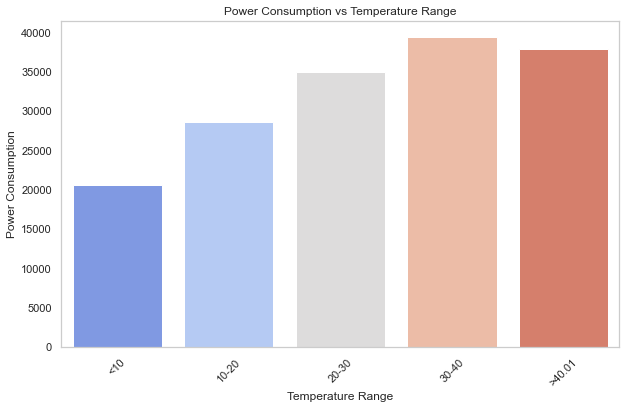

In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame with the 'Temperature' and 'power_consumption_in_A_zone' columns
# Find the minimum and maximum temperature values
min_temperature = df['Temperature'].min()
max_temperature = df['Temperature'].max()

# Define the temperature ranges
temperature_ranges = [min_temperature, 10, 20, 30, 40, max_temperature]  # Customize the ranges as needed

# Define labels for the temperature ranges
temperature_labels = ['<10', '10-20', '20-30', '30-40', f'>{max_temperature}']

# Create a new column 'Temperature Range' based on the defined ranges
df['Temperature Range'] = pd.cut(df['Temperature'], bins=temperature_ranges, labels=temperature_labels, include_lowest=True)

# Create a bar plot to visualize the relationship between temperature ranges and power consumption
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Temperature Range', y='power_consumption_in_A_zone', ci=None, palette='coolwarm')
plt.xlabel('Temperature Range')
plt.ylabel('Power Consumption')
plt.title('Power Consumption vs Temperature Range')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


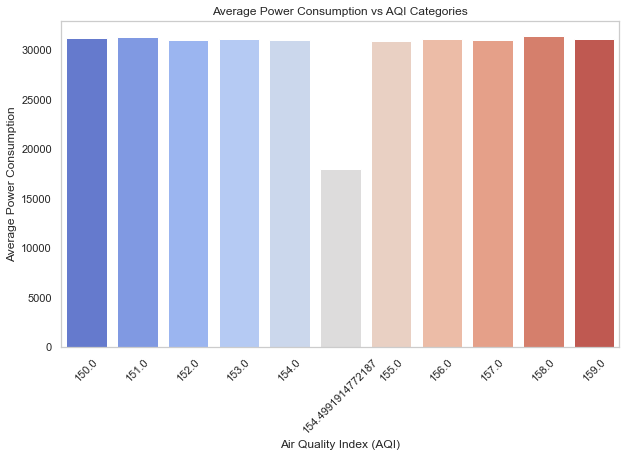

In [154]:
# Group the data by AQI categories and calculate the average power consumption for each category
aqi_power_avg = df.groupby('Air_Quality_Index_PM')['power_consumption_in_A_zone'].mean().reset_index()

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=aqi_power_avg, x='Air_Quality_Index_PM', y='power_consumption_in_A_zone', palette='coolwarm')
plt.xlabel('Air Quality Index (AQI)')
plt.ylabel('Average Power Consumption')
plt.title('Average Power Consumption vs AQI Categories')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility if needed
plt.grid(axis='y')
plt.show()

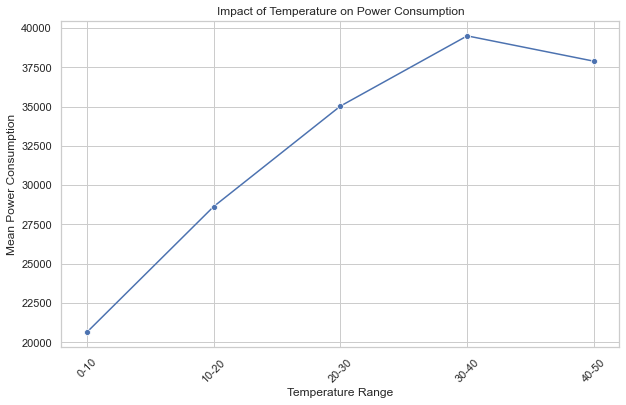

In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame with 'Temperature' and 'power_consumption_in_A_zone' columns

# Define the temperature ranges and labels
temperature_ranges = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
temperature_labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']

# Create a new column 'Temperature Range' based on the temperature ranges
df['Temperature Range'] = pd.cut(df['Temperature'], bins=temperature_ranges, labels=temperature_labels)

# Calculate the mean power consumption for each temperature range
mean_power_consumption = df.groupby('Temperature Range')['power_consumption_in_A_zone'].mean().reset_index()

# Create a line plot to visualize the impact of temperature ranges on power consumption
plt.figure(figsize=(10, 6))
sns.lineplot(data=mean_power_consumption, x='Temperature Range', y='power_consumption_in_A_zone', marker='o')
plt.xlabel('Temperature Range')
plt.ylabel('Mean Power Consumption')
plt.title('Impact of Temperature on Power Consumption')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


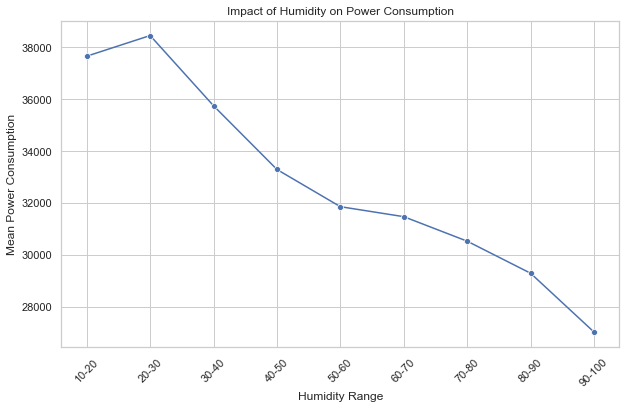

In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame with 'Humidity' and 'power_consumption_in_A_zone' columns

# Define the humidity ranges and labels
humidity_ranges = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
humidity_labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']

# Create a new column 'Humidity Range' based on the humidity ranges
df['Humidity Range'] = pd.cut(df['Humidity'], bins=humidity_ranges, labels=humidity_labels)

# Calculate the mean power consumption for each humidity range
mean_power_consumption = df.groupby('Humidity Range')['power_consumption_in_A_zone'].mean().reset_index()

# Create a line plot to visualize the impact of humidity ranges on power consumption
plt.figure(figsize=(10, 6))
sns.lineplot(data=mean_power_consumption, x='Humidity Range', y='power_consumption_in_A_zone', marker='o')
plt.xlabel('Humidity Range')
plt.ylabel('Mean Power Consumption')
plt.title('Impact of Humidity on Power Consumption')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


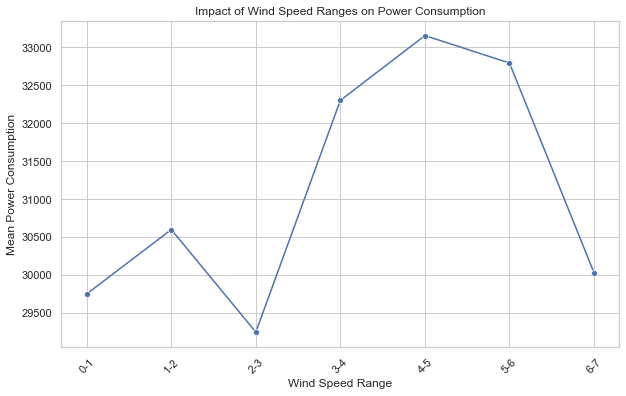

In [157]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame with 'wind_speed' and 'power_consumption_in_A_zone' columns

# Define the wind speed ranges and labels
wind_speed_ranges = [0, 1, 2, 3, 4, 5, 6, 7]
wind_speed_labels = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7']

# Create a new column 'Wind Speed Range' based on the wind speed ranges
df['Wind Speed Range'] = pd.cut(df['wind_speed'], bins=wind_speed_ranges, labels=wind_speed_labels, right=False)

# Calculate the mean power consumption for each wind speed range
mean_power_consumption = df.groupby('Wind Speed Range')['power_consumption_in_A_zone'].mean().reset_index()

# Create a line plot to visualize the impact of wind speed ranges on power consumption
plt.figure(figsize=(10, 6))
sns.lineplot(data=mean_power_consumption, x='Wind Speed Range', y='power_consumption_in_A_zone', marker='o')
plt.xlabel('Wind Speed Range')
plt.ylabel('Mean Power Consumption')
plt.title('Impact of Wind Speed Ranges on Power Consumption')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


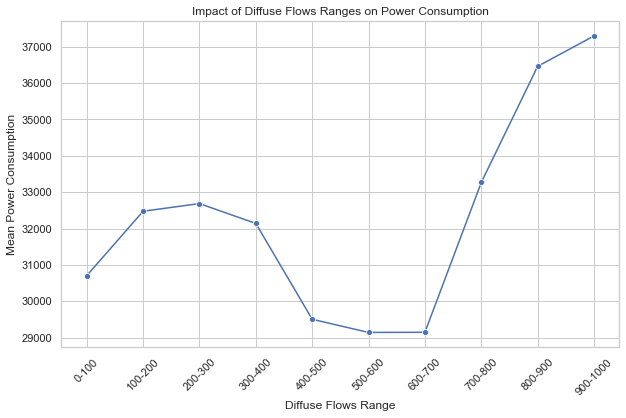

In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame with 'diffuse_flows' and 'power_consumption_in_A_zone' columns

# Define the diffuse flows ranges and labels
diffuse_flows_ranges = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
diffuse_flows_labels = ['0-100', '100-200', '200-300', '300-400', '400-500', '500-600', '600-700', '700-800', '800-900', '900-1000']

# Create a new column 'Diffuse Flows Range' based on the diffuse flows ranges
df['Diffuse Flows Range'] = pd.cut(df['diffuse_flows'], bins=diffuse_flows_ranges, labels=diffuse_flows_labels, right=False)

# Calculate the mean power consumption for each diffuse flows range
mean_power_consumption = df.groupby('Diffuse Flows Range')['power_consumption_in_A_zone'].mean().reset_index()

# Create a line plot to visualize the impact of diffuse flows ranges on power consumption
plt.figure(figsize=(10, 6))
sns.lineplot(data=mean_power_consumption, x='Diffuse Flows Range', y='power_consumption_in_A_zone', marker='o')
plt.xlabel('Diffuse Flows Range')
plt.ylabel('Mean Power Consumption')
plt.title('Impact of Diffuse Flows Ranges on Power Consumption')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


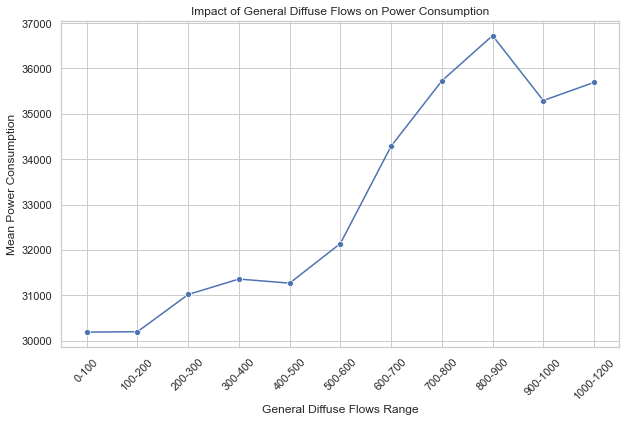

In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame with 'general_diffuse_flows' and 'power_consumption_in_A_zone' columns

# Define the general diffuse flows ranges and labels
general_diffuse_flows_ranges = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1200]
general_diffuse_flows_labels = ['0-100', '100-200', '200-300', '300-400', '400-500', '500-600', '600-700', '700-800', '800-900', '900-1000', '1000-1200']

# Create a new column 'General Diffuse Flows Range' based on the general diffuse flows ranges
df['General Diffuse Flows Range'] = pd.cut(df['general_diffuse_flows'], bins=general_diffuse_flows_ranges, labels=general_diffuse_flows_labels, right=False)

# Calculate the mean power consumption for each general diffuse flows range
mean_power_consumption = df.groupby('General Diffuse Flows Range')['power_consumption_in_A_zone'].mean().reset_index()

# Create a line plot to visualize the impact of general diffuse flows ranges on power consumption
plt.figure(figsize=(10, 6))
sns.lineplot(data=mean_power_consumption, x='General Diffuse Flows Range', y='power_consumption_in_A_zone', marker='o')
plt.xlabel('General Diffuse Flows Range')
plt.ylabel('Mean Power Consumption')
plt.title('Impact of General Diffuse Flows on Power Consumption')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


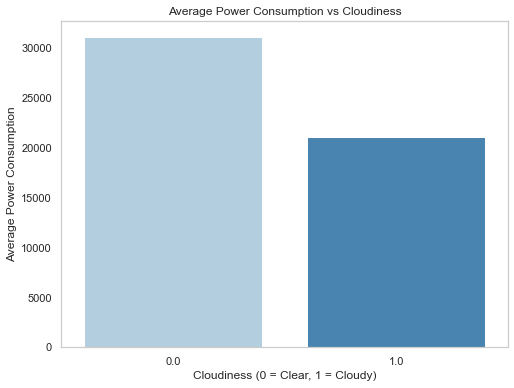

In [160]:
# Assuming 'df' is your DataFrame with 'Cloudiness' (0 or 1) and 'power_consumption_in_A_zone' columns

# Group the data by cloudiness and calculate the average power consumption
cloudiness_power_avg = df.groupby('Cloudiness')['power_consumption_in_A_zone'].mean().reset_index()

# Create a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(data=cloudiness_power_avg, x='Cloudiness', y='power_consumption_in_A_zone', palette='Blues')
plt.xlabel('Cloudiness (0 = Clear, 1 = Cloudy)')
plt.ylabel('Average Power Consumption')
plt.title('Average Power Consumption vs Cloudiness')
plt.grid(axis='y')
plt.show()

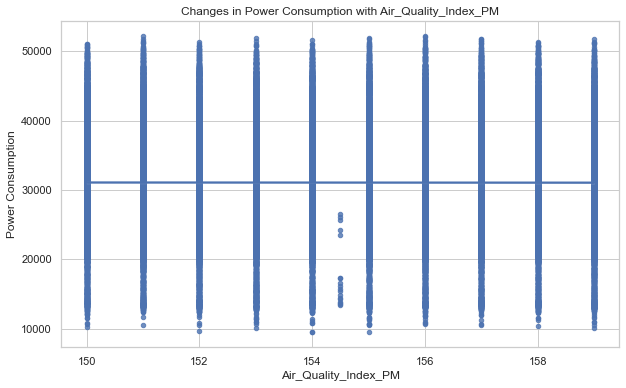

In [161]:

Air_Quality_Index_PM = df['Air_Quality_Index_PM']
power_consumption = df['power_consumption_in_A_zone']
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.regplot(x=Air_Quality_Index_PM, y=power_consumption, scatter_kws={"s": 20})
plt.title('Changes in Power Consumption with Air_Quality_Index_PM')
plt.xlabel('Air_Quality_Index_PM')
plt.ylabel('Power Consumption')
plt.show()

In [162]:
df.head()

,S no,Temperature,Humidity,wind_speed,general_diffuse_flows,diffuse_flows,Air_Quality_Index_PM,Cloudiness,power_consumption_in_A_zone,Temperature Range,Humidity Range,Wind Speed Range,Diffuse Flows Range,General Diffuse Flows Range
0,1,6.559,73.8,0.083,0.051,0.119,158.0,1.0,34055.69620,0-10,70-80,0-1,0-100,0-100
1,2,6.414,74.5,0.083,0.070,0.085,159.0,1.0,29814.68354,0-10,70-80,0-1,0-100,0-100
2,3,6.313,74.5,0.080,0.062,0.100,151.0,1.0,29128.10127,0-10,70-80,0-1,0-100,0-100
3,4,6.121,75.0,0.083,0.091,0.096,151.0,1.0,28228.86076,0-10,70-80,0-1,0-100,0-100
4,5,5.921,75.7,0.081,0.048,0.085,154.0,1.0,27335.69620,0-10,70-80,0-1,0-100,0-100


In [163]:
# # Plot the line graph
# mean_power_consumption = df.groupby(['Temperature Range', 'Humidity Range', 'Wind Speed Range'])['power_consumption_in_A_zone'].mean().reset_index()
# x_values = mean_power_consumption.index
#  # Values for the x-axis (e.g., time, categories)
# y_values1 = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]  # Values for the first variable on the y-axis
# y_values2 = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1200]   # Values for the second variable on the y-axis
# y_values3 = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
# y_values4 = [0, 1, 2, 3, 4, 5, 6, 7]


# plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
# plt.plot(x_values, y_values1, label='Humidity Range', marker='o', linestyle='-')
# plt.plot(x_values, y_values2, label='General Diffuse Flows Range', marker='s', linestyle='--')
# plt.plot(x_values, y_values3, label='Temperature Range ', marker='^', linestyle='-.')
# plt.plot(x_values, y_values3, label='Wind Speed Range ', marker='^', linestyle='-.')

# plt.xlabel('X-Axis Label')
# plt.ylabel('Y-Axis Label')
# plt.title('Line Graph with Multiple Variables on X-Axis')
# plt.grid(True)
# plt.legend()
# plt.tight_layout()  # Ensures labels are not cut off in the saved image
# plt.show()

In [164]:
# import pandas as pd



# #df = pd.DataFrame(data)

# # Define specific ranges for temperature, humidity, and wind speed
# temperature_range = (3.247, 25)  # 'cool' if temperature is in this range
# humidity_range = (11.34, 94.8)   # 'warm' if humidity is in this range
# wind_speed_range = (0.05, 6.483) # 'hot' if wind speed is in this range
# cloudiness_values = [0, 1]

# # Create a list of category labels for each condition
# temperature_category = 'cool'
# humidity_category = 'warm'
# wind_speed_category = 'hot'
# cloudiness_categories = {0: 'cloudy', 1: 'clear'}

# # Categorize days based on conditions
# df['Temperature Category'] = df['Temperature'].apply(lambda x: temperature_category if temperature_range[0] <= x <= temperature_range[1] else '')
# df['Humidity Category'] = df['Humidity'].apply(lambda x: humidity_category if humidity_range[0] <= x <= humidity_range[1] else '')
# df['Wind Speed Category'] = df['wind_speed'].apply(lambda x: wind_speed_category if wind_speed_range[0] <= x <= wind_speed_range[1] else '')
# df['Cloudiness Category'] = df['Cloudiness'].map(cloudiness_categories)

# # Create a combined category based on all conditions
# #df['Combined Category'] = df['Temperature Category'] + ' - ' + df['Humidity Category'] + ' - ' + df['Wind Speed Category'] + ' - ' + df['Cloudiness Category']

# # Now, the 'Combined Category' column contains the categorized values: 'cool,' 'warm,' or 'hot'
# print(df)


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52583 entries, 0 to 52582
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   S no                         52583 non-null  int64   
 1   Temperature                  52583 non-null  float64 
 2   Humidity                     52583 non-null  float64 
 3   wind_speed                   52583 non-null  float64 
 4   general_diffuse_flows        52583 non-null  float64 
 5   diffuse_flows                52583 non-null  float64 
 6   Air_Quality_Index_PM         52583 non-null  float64 
 7   Cloudiness                   52583 non-null  float64 
 8   power_consumption_in_A_zone  52583 non-null  float64 
 9   Temperature Range            52583 non-null  category
 10  Humidity Range               52583 non-null  category
 11  Wind Speed Range             52583 non-null  category
 12  Diffuse Flows Range          52583 non-null  category
 13  G

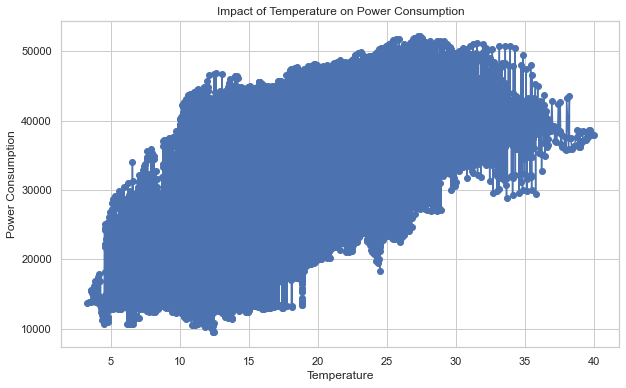

In [166]:

# Assuming 'df' is your DataFrame with 'Temperature' and 'power_consumption_in_A_zone' columns

# Sort the DataFrame by 'Temperature' for a smoother line plot
df_sorted = df.sort_values(by='Temperature')

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['Temperature'], df_sorted['power_consumption_in_A_zone'], marker='o', linestyle='-')
plt.xlabel('Temperature')
plt.ylabel('Power Consumption')
plt.title('Impact of Temperature on Power Consumption')
plt.grid(True)
plt.show()

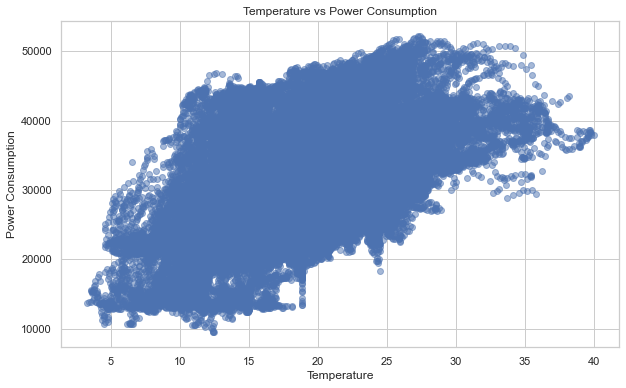

In [167]:
temperature = df['Temperature']
power_consumption = df['power_consumption_in_A_zone']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(temperature, power_consumption, alpha=0.5)
plt.title('Temperature vs Power Consumption')
plt.xlabel('Temperature')
plt.ylabel('Power Consumption')
plt.grid(True)
plt.show()

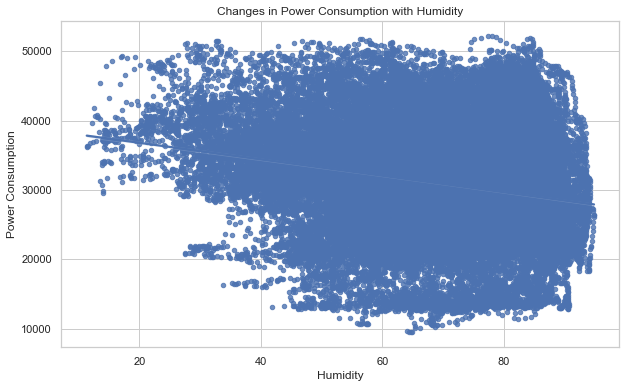

In [169]:
import matplotlib.pyplot as plt
humidity = df['Humidity']
power_consumption = df['power_consumption_in_A_zone']
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.regplot(x=humidity, y=power_consumption, scatter_kws={"s": 20})
plt.title('Changes in Power Consumption with Humidity')
plt.xlabel('Humidity')
plt.ylabel('Power Consumption')
plt.show()

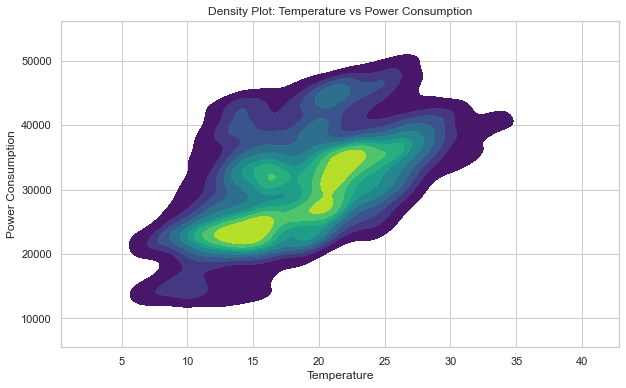

In [170]:

# Assuming 'df' is your DataFrame with temperature and power consumption columns
temperature = df['Temperature']
power_consumption = df['power_consumption_in_A_zone']

# Create a 2D density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(x=temperature, y=power_consumption, cmap='viridis', fill=True)
plt.title('Density Plot: Temperature vs Power Consumption')
plt.xlabel('Temperature')
plt.ylabel('Power Consumption')
plt.grid(True)
plt.show()

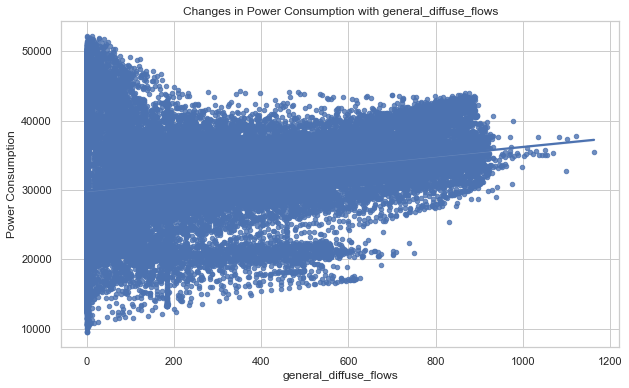

In [171]:
general_diffuse_flows = df['general_diffuse_flows']
power_consumption = df['power_consumption_in_A_zone']
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.regplot(x=general_diffuse_flows, y=power_consumption, scatter_kws={"s": 20})
plt.title('Changes in Power Consumption with general_diffuse_flows')
plt.xlabel('general_diffuse_flows')
plt.ylabel('Power Consumption')
plt.show()

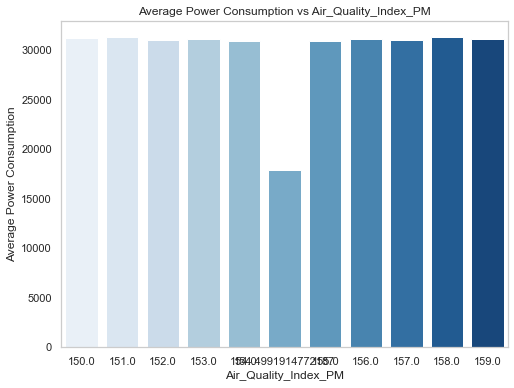

In [172]:
# Group the data by cloudiness and calculate the average power consumption
Air_Quality_Index_PM_avg = df.groupby('Air_Quality_Index_PM')['power_consumption_in_A_zone'].mean().reset_index()

# Create a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(data=Air_Quality_Index_PM_avg, x='Air_Quality_Index_PM', y='power_consumption_in_A_zone', palette='Blues')
plt.xlabel('Air_Quality_Index_PM')
plt.ylabel('Average Power Consumption')
plt.title('Average Power Consumption vs Air_Quality_Index_PM')
plt.grid(axis='y')
plt.show()

<Figure size 720x432 with 0 Axes>

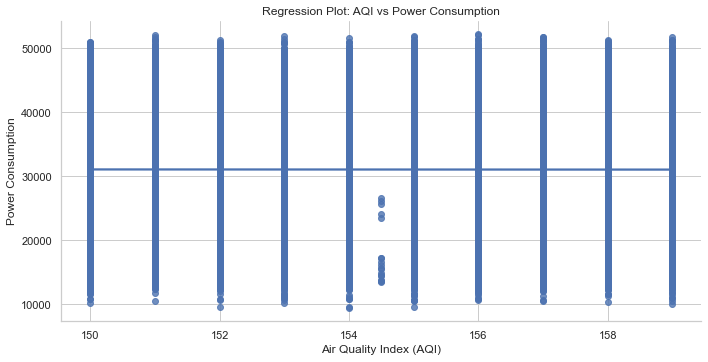

In [173]:
# Create a regression plot with a fitted line
plt.figure(figsize=(10, 6))
sns.lmplot(data=df, x='Air_Quality_Index_PM', y='power_consumption_in_A_zone', ci=None, aspect=2)
plt.xlabel('Air Quality Index (AQI)')
plt.ylabel('Power Consumption')
plt.title('Regression Plot: AQI vs Power Consumption')
plt.grid(True)
plt.show()
#In this regression plot, the fitted line and its slope provide insights into how power consumption changes with increasing AQI values. If the slope is positive, it suggests that as AQI increases, power consumption tends to increase.







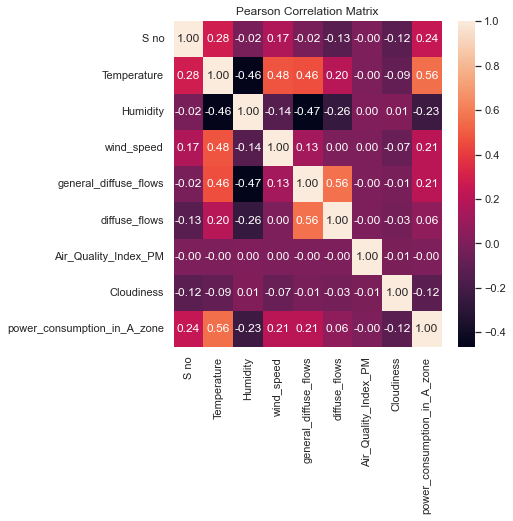

In [249]:
correlations= df.corr(method= 'pearson')
fig= plt.figure(figsize= (6,6))
sns.heatmap(correlations, annot= True, fmt='.2f')
plt.title('Pearson Correlation Matrix')
plt.show()

In [175]:
#outlier treatment using IQR
Q1= df['diffuse_flows'].quantile(0.25)
Q3= df['diffuse_flows'].quantile(0.75)
IQR= Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower_Whisker= Q1- 1.5*IQR
Upper_Whisker= Q3+ 1.5*IQR
print(Lower_Whisker, Upper_Whisker)


0.122
100.45
100.328
-150.37 250.942


<AxesSubplot:>

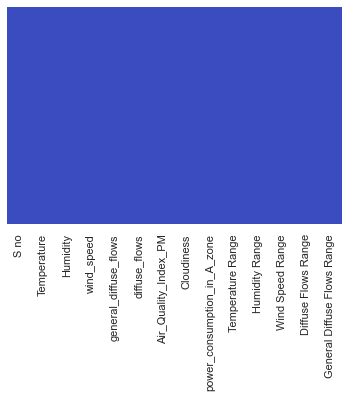

In [176]:
sns.heatmap(df.isnull(), yticklabels= False, cbar= False, cmap= 'coolwarm')

In [177]:
df.shape

(52583, 14)

In [178]:
mydata= df.drop(['Temperature Range', 'Humidity Range','Wind Speed Range','Diffuse Flows Range','General Diffuse Flows Range'], axis=1)


In [ ]:
#eda
!pip install pandas_profiling

In [240]:
import pandas_profiling
from pandas_profiling import ProfileReport
report= ProfileReport(mydata)
report.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [179]:
mydata.head()

,S no,Temperature,Humidity,wind_speed,general_diffuse_flows,diffuse_flows,Air_Quality_Index_PM,Cloudiness,power_consumption_in_A_zone
0,1,6.559,73.8,0.083,0.051,0.119,158.0,1.0,34055.69620
1,2,6.414,74.5,0.083,0.070,0.085,159.0,1.0,29814.68354
2,3,6.313,74.5,0.080,0.062,0.100,151.0,1.0,29128.10127
3,4,6.121,75.0,0.083,0.091,0.096,151.0,1.0,28228.86076
4,5,5.921,75.7,0.081,0.048,0.085,154.0,1.0,27335.69620


In [180]:
mydata.shape

(52583, 9)

In [181]:
(52582*80)/100

42065.6

In [182]:
52583-42065

10518

In [183]:
train= mydata.iloc[:42065, :]
test= mydata.iloc[42066:,:]

In [184]:
train.isnull().sum()

S no                           0
Temperature                    0
Humidity                       0
wind_speed                     0
general_diffuse_flows          0
diffuse_flows                  0
Air_Quality_Index_PM           0
Cloudiness                     0
power_consumption_in_A_zone    0
dtype: int64

In [185]:
test.isnull().sum()

S no                           0
Temperature                    0
Humidity                       0
wind_speed                     0
general_diffuse_flows          0
diffuse_flows                  0
Air_Quality_Index_PM           0
Cloudiness                     0
power_consumption_in_A_zone    0
dtype: int64

In [186]:
x_train= train.drop(['S no', 'power_consumption_in_A_zone'], axis=1)
y_train= train['power_consumption_in_A_zone']

In [187]:
y_train.head()

0    34055.69620
1    29814.68354
2    29128.10127
3    28228.86076
4    27335.69620
Name: power_consumption_in_A_zone, dtype: float64

In [188]:
x_test= test.drop(['S no', 'power_consumption_in_A_zone'], axis=1)
y_test= test['power_consumption_in_A_zone']

In [189]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_train= scaler.fit_transform(x_train)
x_test= scaler.fit_transform(x_test)

In [190]:
pd.DataFrame(x_train).describe()

,0,1,2,3,4,5,6
count,4.206500e+04,4.206500e+04,4.206500e+04,4.206500e+04,4.206500e+04,4.206500e+04,4.206500e+04
mean,9.171514e-17,1.826979e-16,-6.671102e-14,-6.079477e-16,1.195280e-15,-3.660276e-15,6.385272e-14
std,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00
min,-2.757461e+00,-3.507566e+00,-8.763794e-01,-7.200341e-01,-6.282635e-01,-1.568511e+00,-1.024585e-01
25%,-7.853525e-01,-6.415341e-01,-8.646189e-01,-7.198013e-01,-6.274399e-01,-8.712755e-01,-1.024585e-01
50%,5.865515e-02,1.067219e-01,-8.604188e-01,-6.619972e-01,-5.345093e-01,-1.740395e-01,-1.024585e-01
75%,7.372373e-01,8.537329e-01,1.167426e+00,5.756279e-01,2.359358e-01,8.718144e-01,-1.024585e-01
max,3.448190e+00,1.625644e+00,1.210688e+00,3.444881e+00,6.575753e+00,1.569050e+00,9.760050e+00


In [191]:
# how to treat outlier 
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
pos_outlier = Q3 + 1.5*IQR
neg_outlier = Q1 - 1.5*IQR
train = train[~((train < (Q1 - 1.5*IQR)) | (train > (Q3 + 1.5*IQR))).any(axis=1)]

In [192]:
# how to treat outlier 
Q1 = test.quantile(0.25)
Q3 = test.quantile(0.75)
IQR = Q3 - Q1
pos_outlier = Q3 + 1.5*IQR
neg_outlier = Q1 - 1.5*IQR
test = test[~((test < (Q1 - 1.5*IQR)) | (test > (Q3 + 1.5*IQR))).any(axis=1)]

In [256]:
Transformation approach - we are not removing any value, just transfer it
train = np.where(train < (Q1 - 1.5*IQR),neg_outlier,train)
train = np.where(train > (Q3 + 1.5*IQR),pos_outlier,train)

test = np.where(test < (Q1 - 1.5*IQR),neg_outlier,test)
test = np.where(test > (Q3 + 1.5*IQR),pos_outlier,test)

In [227]:
print(train.shape)
print(test.shape)

(37782, 9)
(6752, 9)


In [ ]:
#calculating summary statistics before preprocessing:
#pd.DataFrame(x_train).describe()

In [194]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x_train, y_train, test_size=0.2, random_state= 1)


In [195]:
from sklearn.metrics import r2_score, mean_absolute_error

In [196]:
!pip install xgboost


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [213]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.linear_model import Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso, Ridge


In [198]:
#LinearRegression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train, y_train)
y_pred_lr= lr.predict(x_test)
print("r2_score:", r2_score(y_test,y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))

r2_score: 0.361179779862677
MAE: 5410.834027302056


In [212]:
# RandomForest Regression-best 
#@155=r2=0.6868614447103786,mea= 3202.3815314406534
#@152=R2_Score : 0.6868856390590382 ,MAE : 3202.5056332911213
#@153= R2_Score : 0.6868977493541961, MAE : 3202.5256555435462
#@154=R2_Score :  0.6868011715671548, MAE : 3203.0562315014827

rf = RandomForestRegressor(n_estimators=154, random_state=42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
print("R2_Score :", r2_score(y_test, y_pred_rf))
print("*****************************")
print("MAE :", mean_absolute_error(y_test, y_pred_rf))

R2_Score : 0.6868011715671548
*****************************
MAE : 3203.0562315014827


C:\Users\Abhishek\AppData\Local\Temp\ipykernel_21548\478059822.py:25: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()  # Ensures labels are not cut off in the saved image


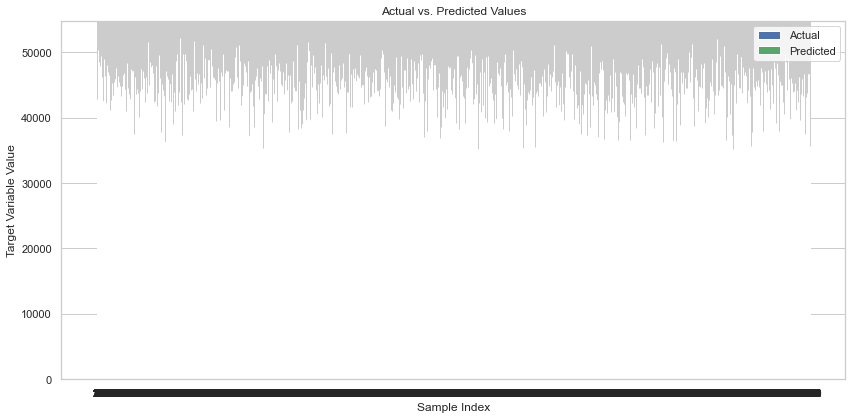

In [242]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Assuming you have already trained the RandomForestRegressor model and made predictions
# # using the code you provided

# # Create a bar graph comparing actual vs. predicted values
# bar_width = 0.35
# index = np.arange(len(y_test))  # Index for the x-axis

# plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

# # Plot the actual values in blue
# plt.bar(index, y_test, bar_width, label='Actual', color='b')

# # Plot the predicted values in green
# plt.bar(index + bar_width, y_pred_rf, bar_width, label='Predicted', color='g')

# plt.xlabel('Sample Index')
# plt.ylabel('Target Variable Value')
# plt.title('Actual vs. Predicted Values')
# plt.xticks(index + bar_width / 2, index)  # Label x-axis with sample indices
# plt.legend()
# plt.grid(True)
# plt.tight_layout()  # Ensures labels are not cut off in the saved image

# plt.show()


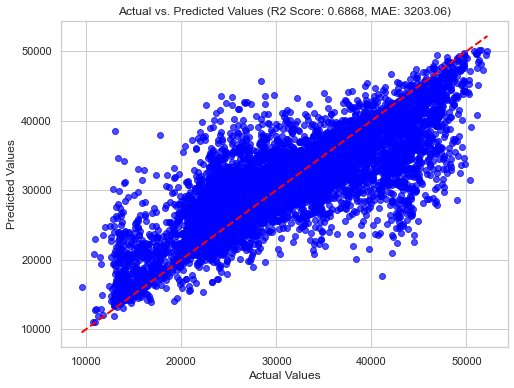

In [220]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the RandomForestRegressor (use your preferred parameters)
rf = RandomForestRegressor(n_estimators=154, random_state=42)
rf.fit(x_train, y_train)

# Make predictions on the test data
y_pred_rf = rf.predict(x_test)

# Calculate R2 score and MAE
r2 = r2_score(y_test, y_pred_rf)
mae = mean_absolute_error(y_test, y_pred_rf)

# Create a scatterplot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, color='blue', alpha=0.7)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Actual vs. Predicted Values (R2 Score: {r2:.4f}, MAE: {mae:.2f})')
plt.grid(True)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.show()


In [218]:
lasso = Lasso(alpha=0.01)  # You can adjust the alpha (penalty) parameter
lasso.fit(x_train, y_train)
y_pred_lasso = lasso.predict(x_test)
lasso_r2 = r2_score(y_test, y_pred_lasso)
lasso_mae = mean_absolute_error(y_test, y_pred_lasso)
print("Lasso Regression R2 Score:", lasso_r2)
print("Lasso Regression MAE:", lasso_mae)

ridge = Ridge(alpha=0.01)  # You can adjust the alpha (penalty) parameter
ridge.fit(x_train, y_train)
y_pred_ridge = ridge.predict(x_test)
ridge_r2 = r2_score(y_test, y_pred_ridge)
ridge_mae = mean_absolute_error(y_test, y_pred_ridge)
print("\nRidge Regression R2 Score:", ridge_r2)
print("Ridge Regression MAE:", ridge_mae)

Lasso Regression R2 Score: 0.3611797888638302
Lasso Regression MAE: 5410.8336169304985

Ridge Regression R2 Score: 0.3611797774053437
Ridge Regression MAE: 5410.834068252898


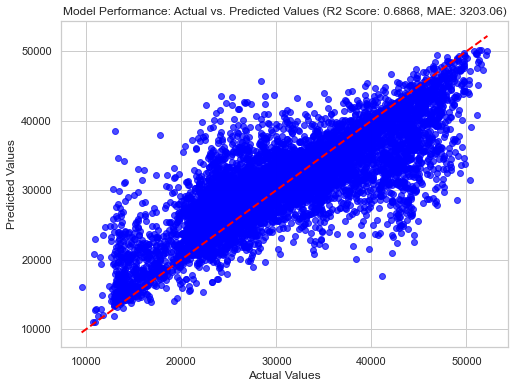

In [222]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the RandomForestRegressor (use your preferred parameters)
rf = RandomForestRegressor(n_estimators=154, random_state=42)
rf.fit(x_train, y_train)

# Make predictions on the test data
y_pred_rf = rf.predict(x_test)

# Calculate R2 score and MAE
r2 = r2_score(y_test, y_pred_rf)
mae = mean_absolute_error(y_test, y_pred_rf)

# Create a scatterplot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, color='blue', alpha=0.7)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Model Performance: Actual vs. Predicted Values (R2 Score: {r2:.4f}, MAE: {mae:.2f})')
plt.grid(True)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.show()


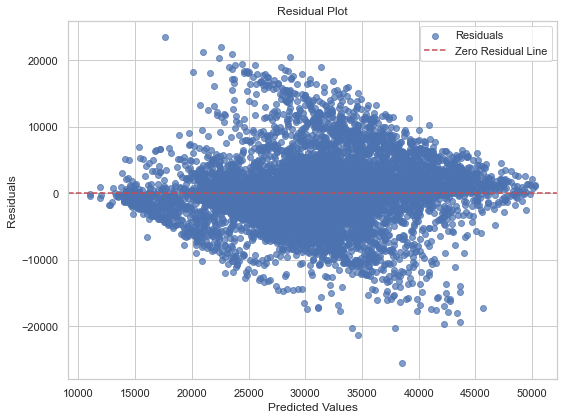

In [224]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'y_true' is the array of actual target values and 'y_pred' is the array of predicted values
# Calculate residuals
residuals = y_test - y_pred_rf

# Create a scatter plot of residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_rf, residuals, c='b', alpha=0.7, label='Residuals')
plt.axhline(y=0, color='r', linestyle='--', label='Zero Residual Line')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [200]:
# DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)
print("R2_Score :", r2_score(y_test, y_pred_dt))
print("*****************************")
print("MAE :", mean_absolute_error(y_test, y_pred_dt))
print("accuracy",dt.score(x_test, y_test))

R2_Score : 0.3864670833347489
*****************************
MAE : 3875.591263835493
accuracy 0.3864670833347489


In [219]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Load your dataset (replace this with your data loading code)
# df = pd.read_csv('your_dataset.csv')

# Define the hyperparameter grid to search through
param_grid = {
    'n_estimators': [100, 150, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20],     # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]     # Minimum number of samples required to be at a leaf node
}

# Create a Random Forest Regressor model
rf = RandomForestRegressor(random_state=1)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)

# Split the data into features (X) and target (y)

# Perform the grid search
grid_search.fit(x_train, y_train)

# Print the best hyperparameters and corresponding R2 score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best R2 Score:", grid_search.best_score_)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best R2 Score: 0.6650270086648499


In [201]:
# SVR
svr = SVR(kernel='rbf', C=10000,epsilon=0.1)
svr.fit(x_train, y_train)
y_pred_svr = svr.predict(x_test)
print("R2_Score :", r2_score(y_test, y_pred_svr))
print("*****************************")
print("MAE :", mean_absolute_error(y_test, y_pred_svr))

R2_Score : 0.4153746754514084
*****************************
MAE : 4714.631158416069


In [202]:
# GradientBoostingRegressor
gdb = GradientBoostingRegressor()
gdb.fit(x_train, y_train)
y_pred_gdb = gdb.predict(x_test)
print("R2_Score :", r2_score(y_test, y_pred_gdb))
print("*****************************")
print("MAE :", mean_absolute_error(y_test, y_pred_gdb))

R2_Score : 0.4829283603739022
*****************************
MAE : 4709.230458094109


In [204]:
# KNN 
knn = KNeighborsRegressor()
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
print("R2_Score :", r2_score(y_test, y_pred_knn))
print("*****************************")
print("MAE :", mean_absolute_error(y_test, y_pred_knn))

R2_Score : 0.44604925100216875
*****************************
MAE : 4607.293889220492


In [ ]:
#from sklearn.tree import plot_tree
#import matplotlib.pyplot as plt

#plt.figure(figsize=(20,10))
#plot_tree(dt, filled= True)
#plot_model(lr, plot='error')
#plt.show()

In [7]:
# feature_importances = rf.feature_importances_

# feature_importance_df = pd.DataFrame({'Feature':mydata.columns, 'Importance': feature_importances})
# feature_importance_df

In [ ]:
zscore1= stats.zscore(df, nan_policy='omit')
print(zscore1)

In [ ]:
#df= df.dropna(axis=0, how='any', inplace= False)


In [ ]:
df.tail(10)

In [ ]:
df1= df[df['diffuse_flows']< Upper_Whisker]

In [ ]:
df1.shape

In [ ]:
sns.boxplot(data= df1, y= df1['diffuse_flows'])

In [ ]:
df.shape

In [ ]:
# using zscore method

zscores= np.abs(stats.zscore(df.diffuse_flows, nan_policy='omit'))
print(zscores)

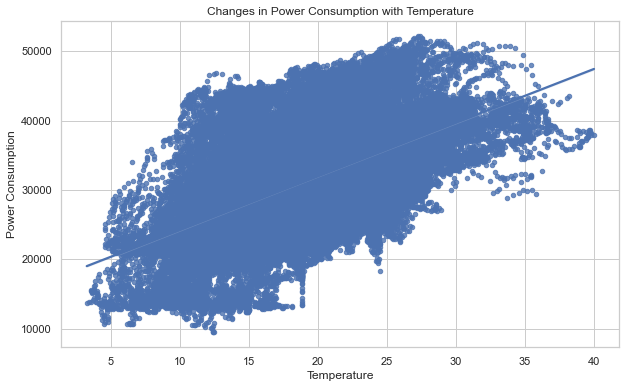

In [168]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Assuming 'df' is your DataFrame with temperature and power consumption columns
# sns.set(style="whitegrid")

# plt.figure(figsize=(10, 6))
# sns.regplot(x=temperature, y=power_consumption, scatter_kws={"s": 20})
# plt.title('Changes in Power Consumption with Temperature')
# plt.xlabel('Temperature')
# plt.ylabel('Power Consumption')
# plt.show()